# Linear Regression

> Linear Regression

In [ ]:
#| default_exp linearregression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./Data/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


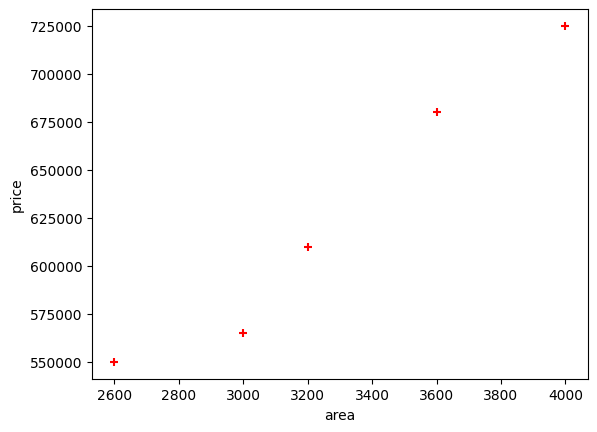

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

plt.show()

In [ ]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
from sklearn import linear_model

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/home/ben/mambaforge/envs/fast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

Y = m * X + b (m is coefficient and b is intercept)

In [ ]:
5000*reg.coef_ + reg.intercept_

array([859554.79452055])

In [ ]:
reg.predict([[5000]])

/home/ben/mambaforge/envs/fast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

## Generate CSV file with list of home price predictions

# Create a list of numbers from 1000 to 5000 with 500 increments

In [ ]:
numbers_list = list(range(2000, 4000, 500))

In [ ]:
# Create a DataFrame using the pandas constructor and a dictionary
data = {'area': numbers_list}
area_df = pd.DataFrame(data)
area_df

,area
0,2000
1,2500
2,3000
3,3500


In [ ]:
p = reg.predict(area_df)
p

array([452191.78082192, 520085.61643836, 587979.45205479, 655873.28767123])

In [ ]:
area_df['prices']=p
area_df

,area,prices
0,2000,452191.780822
1,2500,520085.616438
2,3000,587979.452055
3,3500,655873.287671


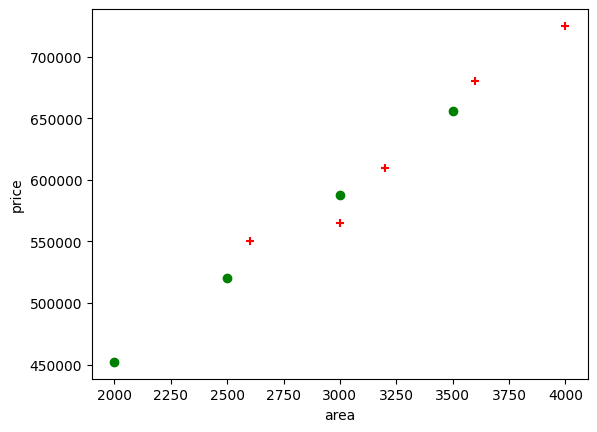

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,
            df.price,
            color='red',
            marker='+')

plt.scatter(area_df.area,
            area_df.prices,
            color='green',
            marker='o')

plt.show()

In [ ]:
area_df.to_csv("./Data/prediction.csv")